# Add Libraries

In [1]:
import os
import time
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
import numpy as np
import math
import seaborn as sns

plt.rcParams.update({
    'font.size': 8,          # Default font size
    'axes.titlesize': 10,    # Title font size
    'axes.labelsize': 9,     # Axis labels font size
    'xtick.labelsize': 8,    # X-axis tick labels font size
    'ytick.labelsize': 8,    # Y-axis tick labels font size
    'legend.fontsize': 8,    # Legend font size
    'figure.titlesize': 10   # Figure title font size
})
plt.rcParams['font.family'] = 'sans-serif'


from core import core_global as core
from core.spike_monitor import SpikeMonitor
from core.voltage_monitor import VoltageMonitor

from core.weight_matrix_monitor import WeightMatrixMonitor

from layers.rewiring_connection import RewiringConnection

from models.poisson_pattern_group import PoissonPatternGroup
from utils import utils as utils
from models.mc_lif_group import McLifGroup

# Exploration Phase

## Set the Results folder address

In [2]:
### set the folder address
exp_name = "rewiring_ex1"
exp_aspect = 'wake_state'
simulation_date = "241117_145956"
trial_number = 0
sim_date = f"{simulation_date}/{trial_number}"
### Model parameters
assembly_number = 9
assembly_size = 30
CA3_size = assembly_number*assembly_size
num_branches = 3
cell_num = 100
AcDcell_num = 50
### set the time window for the plot
time_window = [800,805] 

### CA3-CA1 Raster Plot

Text(0.5, 0, 'Time(s)')

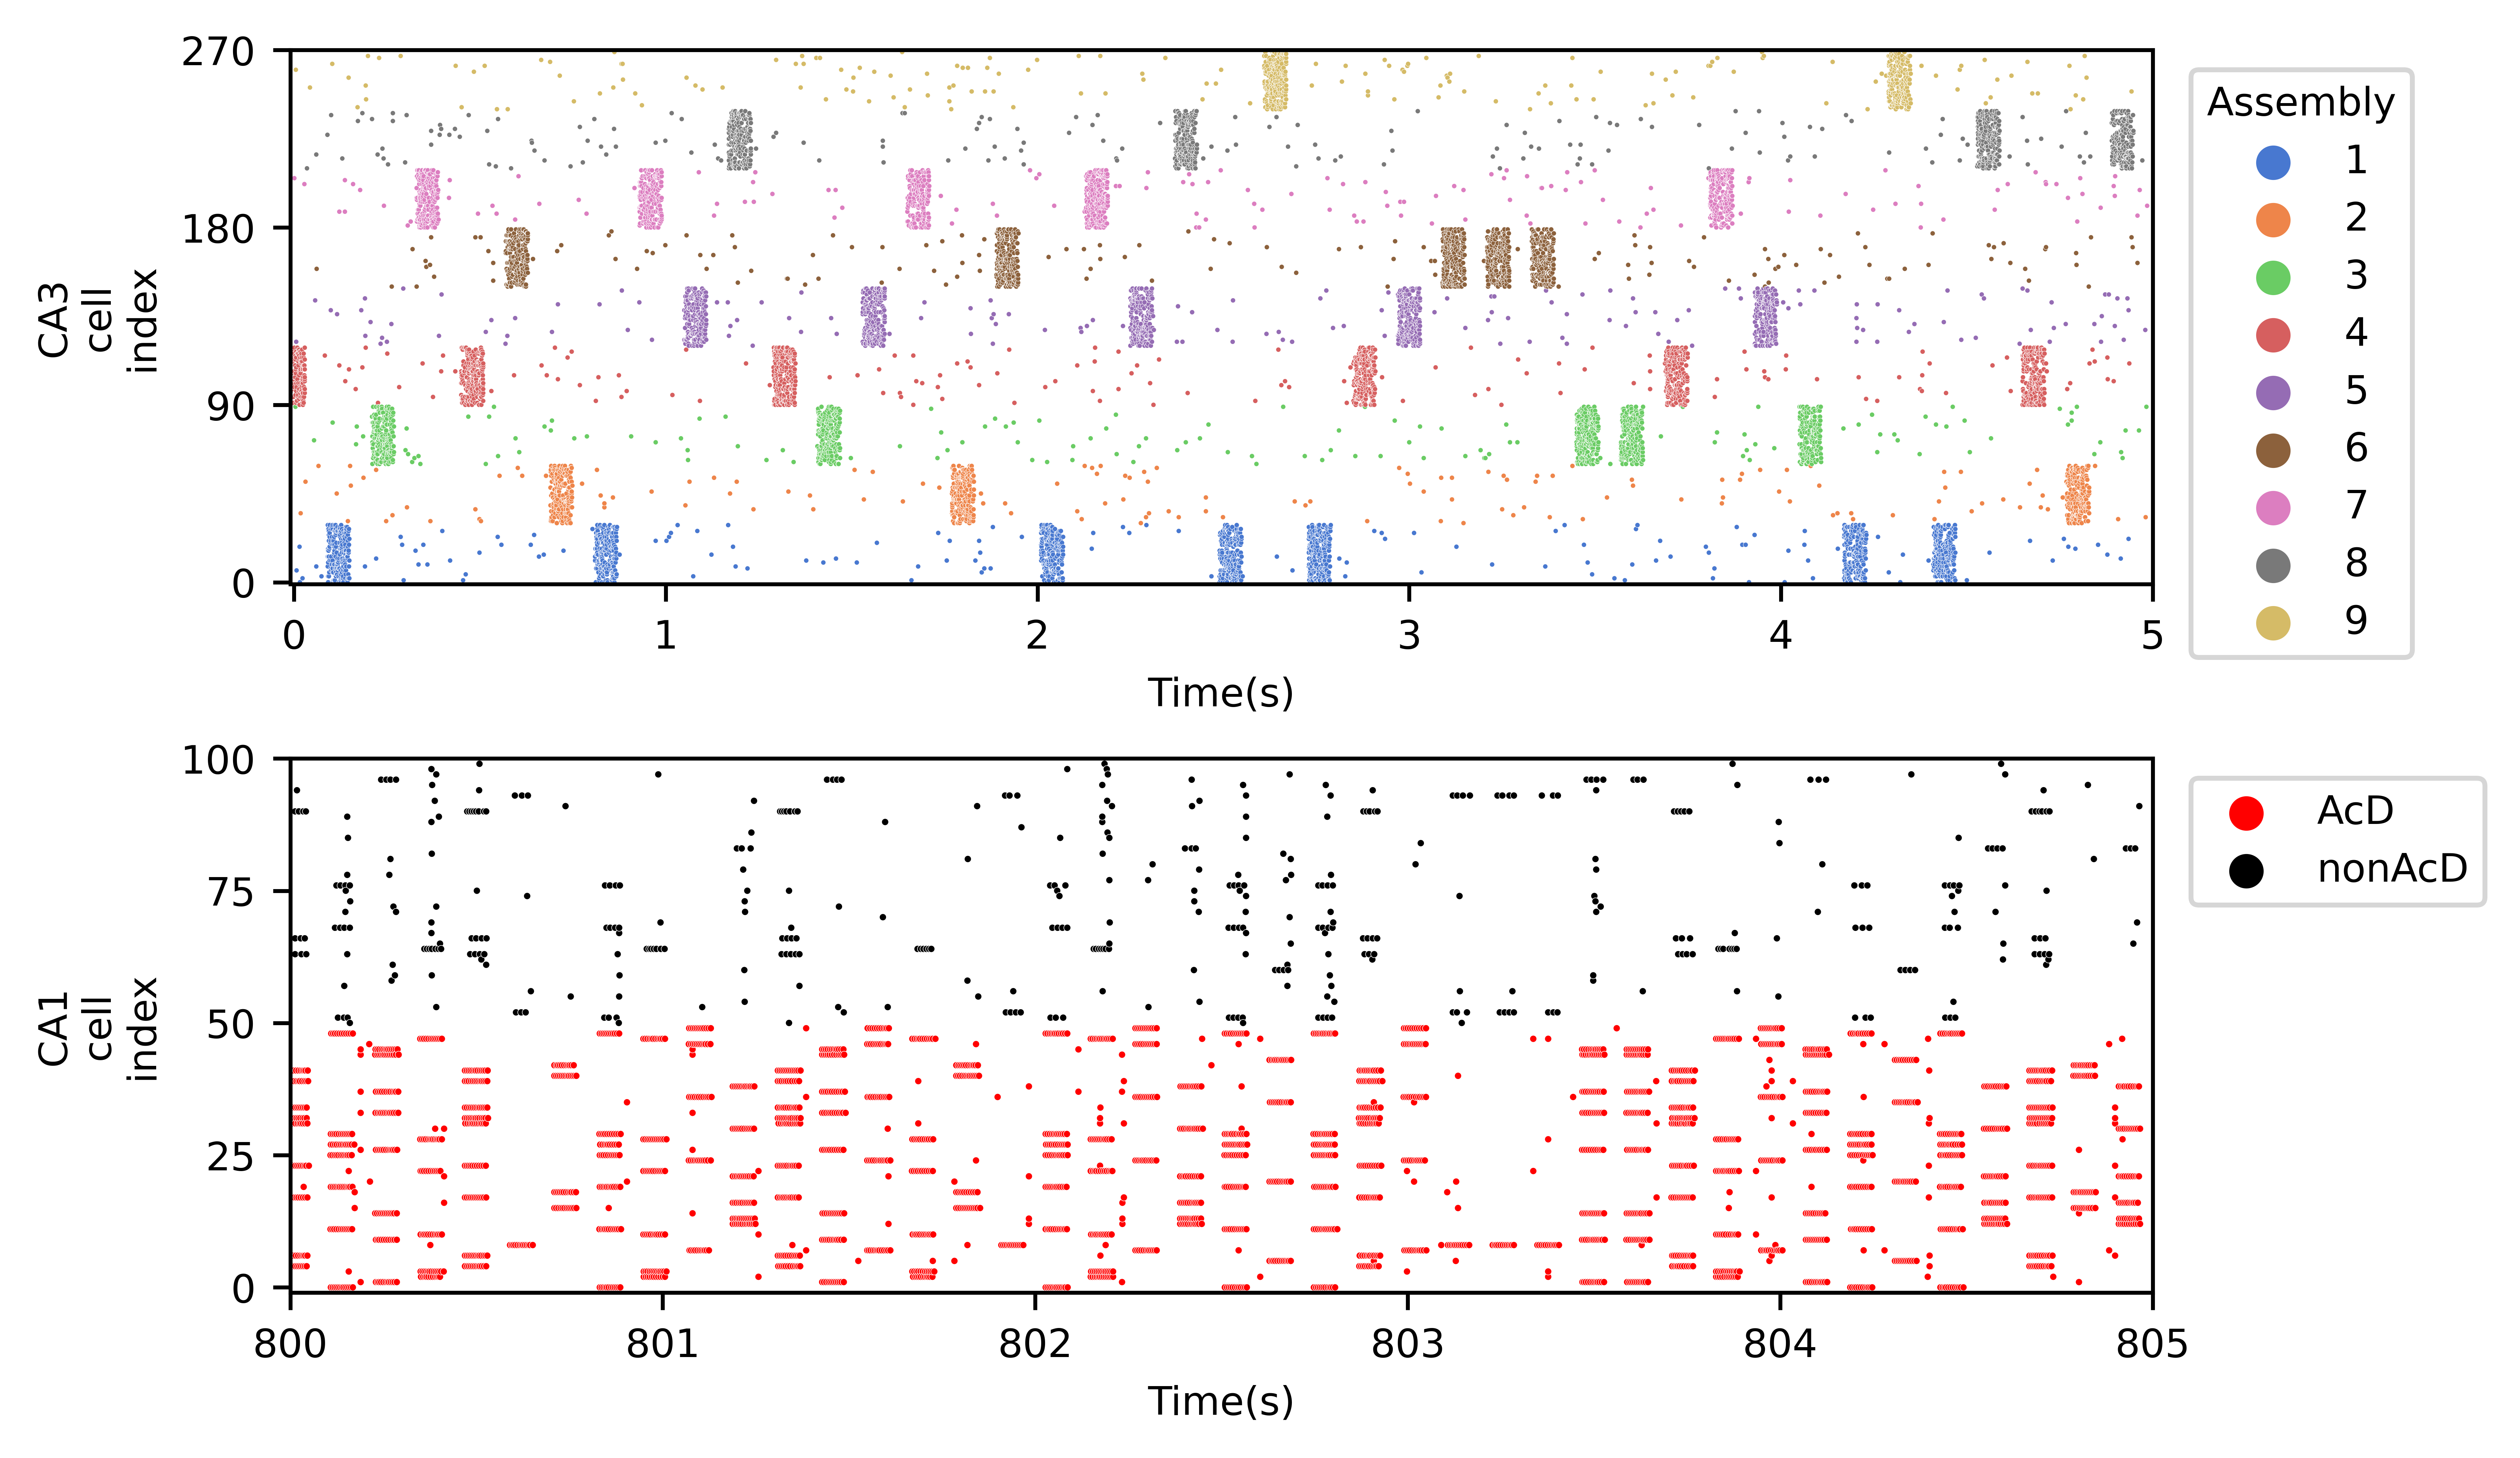

In [3]:
fig, axs = plt.subplots(2,figsize=(7,4),constrained_layout = True,dpi = 1000)

########################## CA3 cells ###########################
with open(f'results/{exp_name}/{exp_aspect}/{simulation_date}/{trial_number}/data/input.0.ras', 'r') as f:
    data_observed = f.read().splitlines(True)
    
assembely_colors_plotting = range(1,assembly_number+1)
active_cell = []
time_list=[]
color_list = []
for component in data_observed[1:]:
        comps = component.split(' ')
        if float(comps[0]) >= time_window[0] and  float(comps[0]) <= time_window[-1]:

            active_cell.append(int(comps[1]))
            color_list.append(assembely_colors_plotting[int(active_cell[-1]/30)])
            time_list.append(float(comps[0]))
        
CA3= {'cell_num': active_cell , 'time(s)': time_list ,'Assembly':color_list}

Activity_data_CA3 = pd.DataFrame(data=CA3)

color_palette = "muted"
sns.scatterplot(ax=axs[0],data=Activity_data_CA3, x="time(s)", y="cell_num",s = 1,hue = 'Assembly', palette = color_palette)
axs[0].legend(loc='upper left',title='Assembly',bbox_to_anchor=(1.01, 1))
# labels = [f'Assembly {i+1}' for i in range(9)]
# handles = [Line2D([0], [0], color=plt.cm.tab10.colors[i], lw=1) for i in range(9)]
# fig.legend(loc='upper right', bbox_to_anchor=(1.1, 1),handles=handles, labels=labels,ncol = 1)


axs[0].set_ylabel("CA3\ncell\nindex")
axs[0].set_xlabel('')

axs[0].set_yticks(range(0,CA3_size+1,90))
axs[0].set_xticks([])

axs[0].set_ylim(-1,CA3_size)
axs[0].set_xlim(time_window[0],time_window[-1])

# ##################### CA1 cells
with open(f'results/{exp_name}/{exp_aspect}/{simulation_date}/{trial_number}/data/output.0.ras', 'r') as f:
    data_observed = f.read().splitlines(True)
    
active_cell = []
time_list=[]
color_list = []
for component in data_observed[1:]:
        comps = component.split(' ')
        if float(comps[0]) >= time_window[0] and  float(comps[0]) <= time_window[-1]:
            active_cell.append(int(comps[1]))
            time_list.append(float(comps[0]))
            if int(comps[1]) < AcDcell_num :
                color_list.append('AcD')
            else:
                color_list.append('nonAcD')
        
CA1 = {'cell_num': active_cell , 'time(s)': time_list , 'Cell type': color_list}

Activity_data_CA1 = pd.DataFrame(data=CA1)

color_palette = {'AcD': 'red', 'nonAcD': 'black'}
sns.scatterplot(ax=axs[1],data=Activity_data_CA1, x="time(s)", y="cell_num",hue = 'Cell type',s = 2, palette = color_palette)#,hue = 'color', palette = color_palette)
axs[1].legend(loc='upper left',bbox_to_anchor=(1.01, 1))

axs[1].set_ylabel("CA1\ncell\nindex" )
axs[1].set_xlabel('Time(s)')

axs[1].set_ylim(-1,cell_num)
axs[1].set_xlim(time_window[0],time_window[-1])

axs[1].set_yticks(range(0,cell_num+1,25))
# axs[1].set_xticks(np.arange(time_window[0]+0.01,time_window[-1]+0.02,.5),[0,0.5,1.0])

axs[0].set_xticks(np.arange(time_window[0]+0.01,time_window[-1]+0.02,1),range(6))
axs[0].set_xlabel('Time(s)')

### CA3 Exploration Phase Protocol

Text(0.5, 0, 'Time(s)')

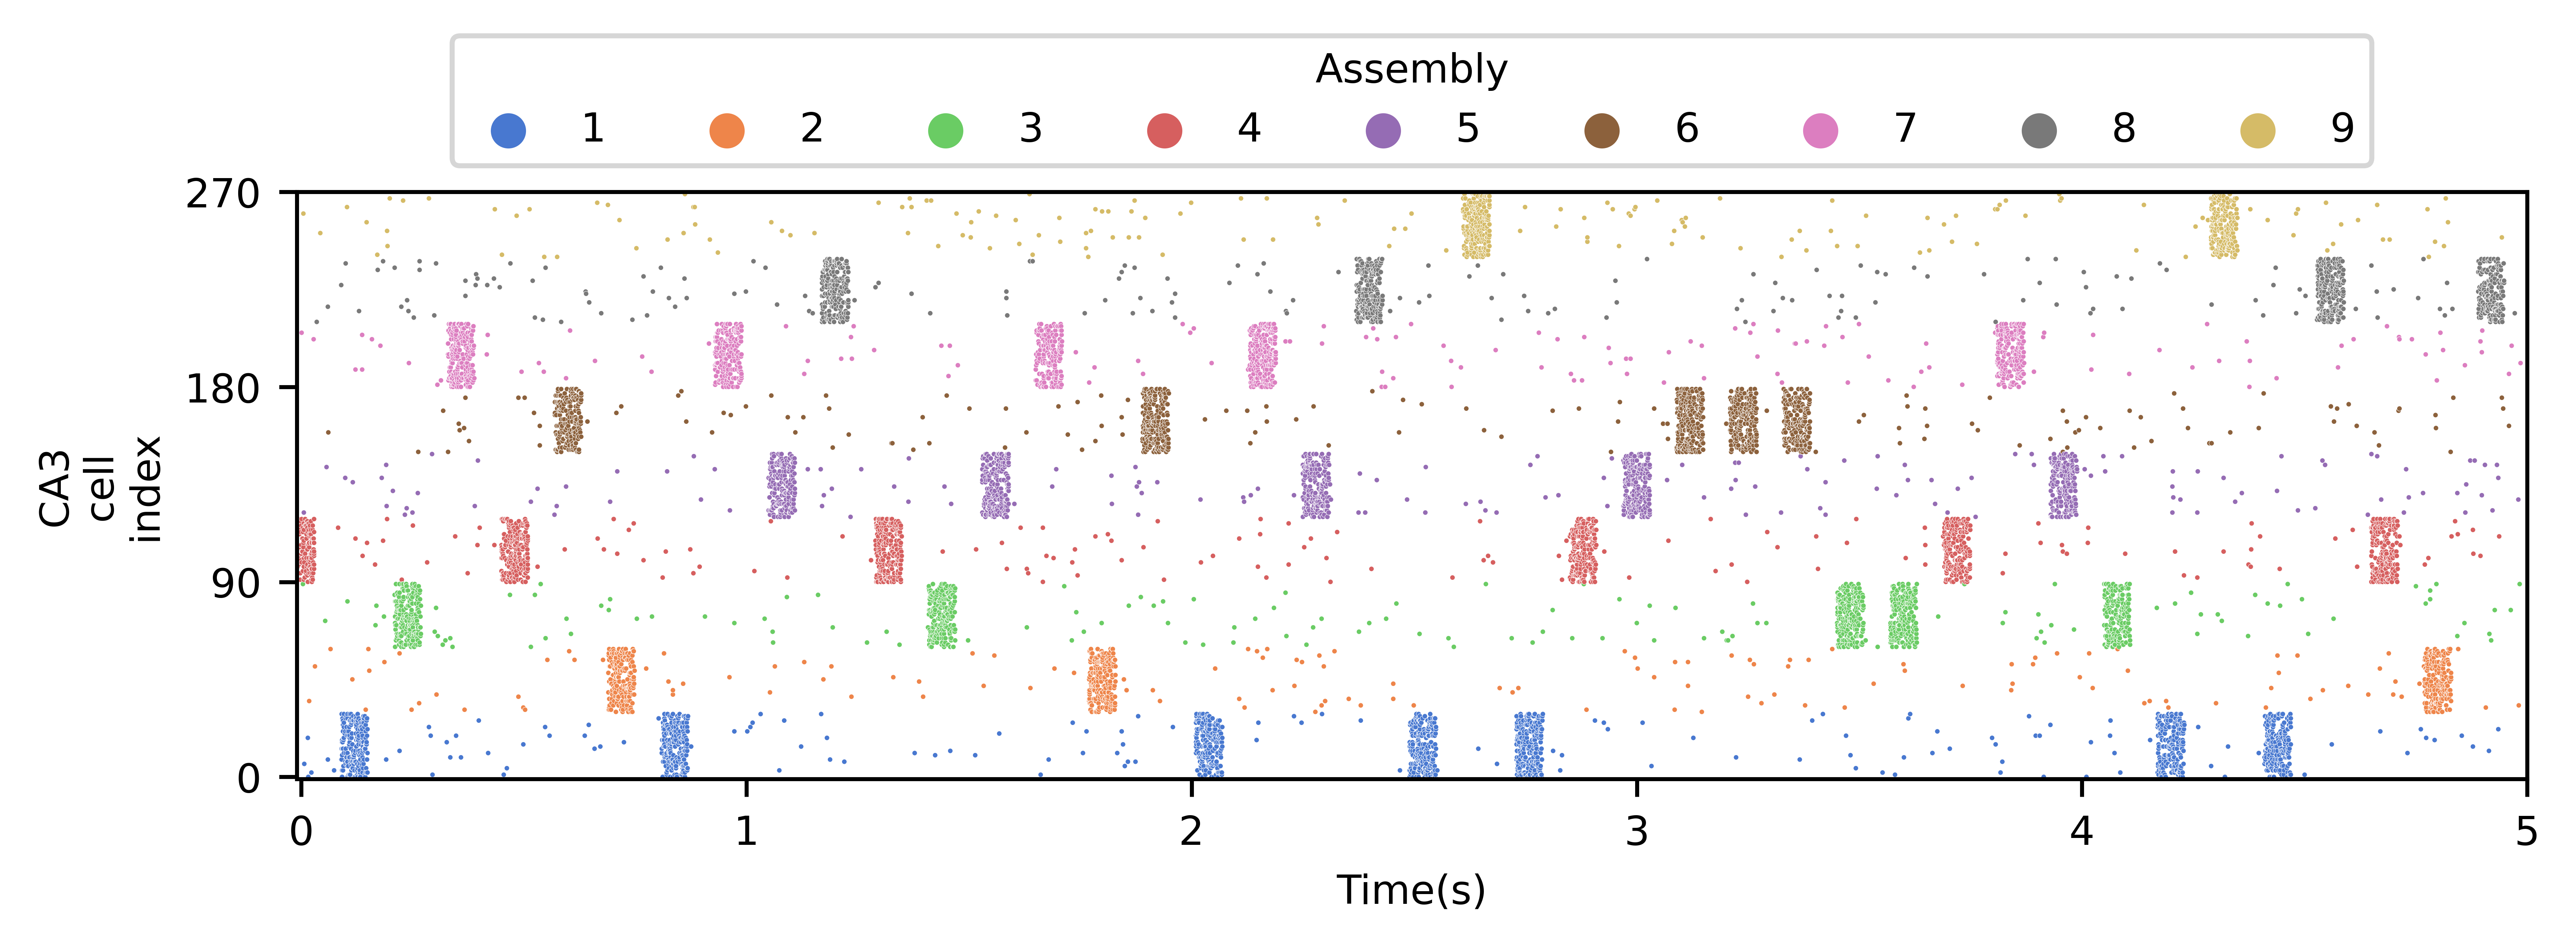

In [4]:
fig, axs = plt.subplots(figsize=(7,2.5),constrained_layout = True,dpi = 1000)

########################## CA3 cells ###########################
with open(f'results/{exp_name}/{exp_aspect}/{simulation_date}/{trial_number}/data/input.0.ras', 'r') as f:
    data_observed = f.read().splitlines(True)
    
assembely_colors_plotting = range(1,assembly_number+1)
active_cell = []
time_list=[]
color_list = []
for component in data_observed[1:]:
        comps = component.split(' ')
        if float(comps[0]) >= time_window[0] and  float(comps[0]) <= time_window[-1]:

            active_cell.append(int(comps[1]))
            color_list.append(assembely_colors_plotting[int(active_cell[-1]/30)])
            time_list.append(float(comps[0]))
        
CA3= {'cell_num': active_cell , 'time(s)': time_list ,'Assembly':color_list}

Activity_data_CA3 = pd.DataFrame(data=CA3)

color_palette = "muted"
sns.scatterplot(ax=axs,data=Activity_data_CA3, x="time(s)", y="cell_num",s = 1,hue = 'Assembly', palette = color_palette)
axs.legend(loc='upper center',title='Assembly',bbox_to_anchor=(0.5, 1.3),ncol = 9)

axs.set_ylabel("CA3\ncell\nindex")
axs.set_xlabel('')

axs.set_yticks(range(0,CA3_size+1,90))
axs.set_xticks([])

axs.set_ylim(-1,CA3_size)
axs.set_xlim(time_window[0],time_window[-1])

axs.set_xticks(np.arange(time_window[0]+0.01,time_window[-1]+0.02,1),range(6))
axs.set_xlabel('Time(s)')

# Ripple phase

## Define the dendritic inhibition windows

In [5]:
inh_max_amp = 140
inh_freq = 150
pattern_duration = 0.1
pattern_delay = 0.4
t_list = np.linspace(1,6,5000)
def inh(t):
    return inh_max_amp*(1 + np.sin(2*np.pi*inh_freq*(t% (pattern_duration + pattern_delay))))*(math.ceil( (t% (pattern_duration + pattern_delay))-pattern_delay ))

results = [inh(i) for i in t_list]

## Set the Results folder address

In [6]:
### set the folder address
exp_name = "rewiring_ex1"
exp_aspect = 'sleep_state_check'
simulation_date = "241119_004111"
trial_number = 0
sim_date = f"{simulation_date}/{trial_number}"
### Model parameters
assembly_number = 9
assembly_size = 30
CA3_size = assembly_number*assembly_size
num_branches = 3
cell_num = 100
AcDcell_num = 50
### set the time window for the plot
time_window = [1,6] 

### CA3-CA1 Raster Plot

Text(0.5, 0, 'Time(s)')

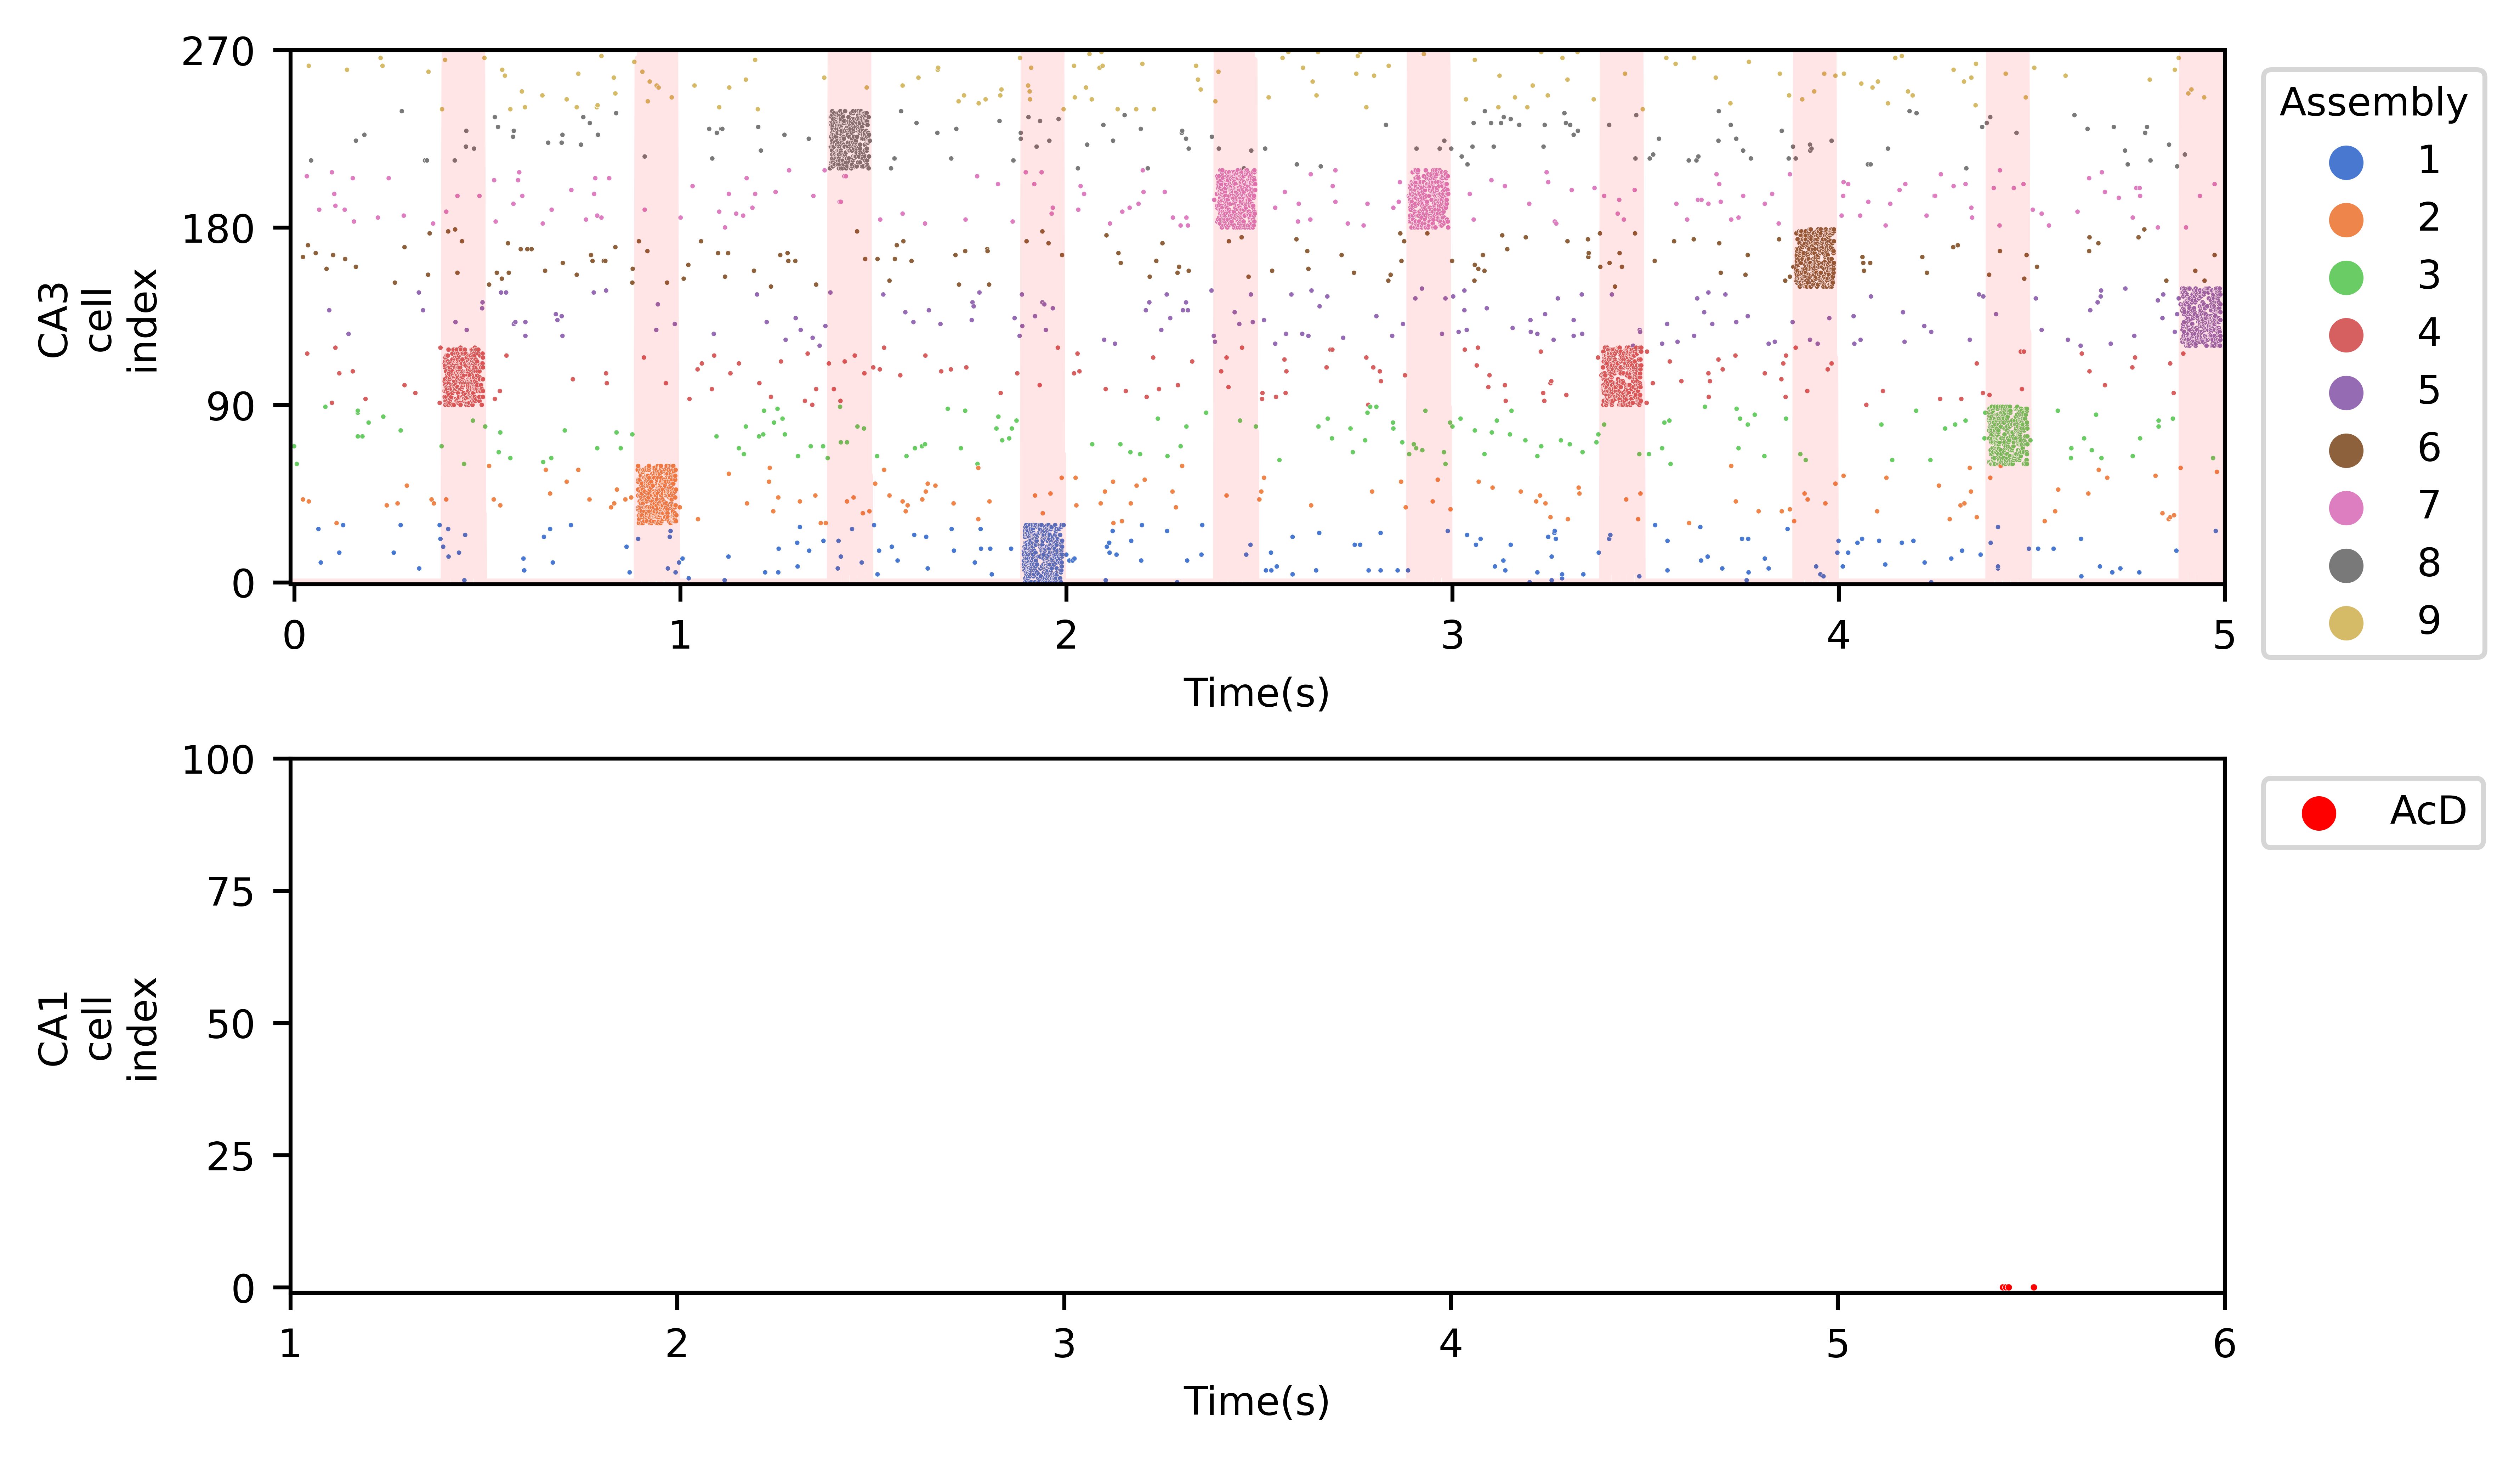

In [7]:
fig, axs = plt.subplots(2,figsize=(7,4),constrained_layout = True,dpi = 1000)

axs[0].plot(t_list,results,color = 'red',alpha=0.1)
########################## CA3 cells ###########################
with open(f'results/{exp_name}/{exp_aspect}/{simulation_date}/{trial_number}/data/input_sleep.0.ras', 'r') as f:
    data_observed = f.read().splitlines(True)
    
assembely_colors_plotting = range(1,assembly_number+1)
active_cell = []
time_list=[]
color_list = []
for component in data_observed[1:]:
        comps = component.split(' ')
        if float(comps[0]) >= time_window[0] and  float(comps[0]) <= time_window[-1]:

            active_cell.append(int(comps[1]))
            color_list.append(assembely_colors_plotting[int(active_cell[-1]/30)])
            time_list.append(float(comps[0]))
        
CA3= {'cell_num': active_cell , 'time(s)': time_list ,'Assembly':color_list}

Activity_data_CA3 = pd.DataFrame(data=CA3)

color_palette = "muted"
sns.scatterplot(ax=axs[0],data=Activity_data_CA3, x="time(s)", y="cell_num",s = 1,hue = 'Assembly', palette = color_palette)
axs[0].legend(loc='upper left',title='Assembly',bbox_to_anchor=(1.01, 1))


axs[0].set_ylabel("CA3\ncell\nindex")
axs[0].set_xlabel('')

axs[0].set_yticks(range(0,CA3_size+1,90))
axs[0].set_xticks([])

axs[0].set_ylim(-1,CA3_size)
axs[0].set_xlim(time_window[0],time_window[-1])

##################### CA1 cells
with open(f'results/{exp_name}/{exp_aspect}/{simulation_date}/{trial_number}/data/output_sleep.0.ras', 'r') as f:
    data_observed = f.read().splitlines(True)
    
active_cell = []
time_list=[]
color_list = []
for component in data_observed[1:]:
        comps = component.split(' ')
        if float(comps[0]) >= time_window[0] and  float(comps[0]) <= time_window[-1]:
            active_cell.append(int(comps[1]))
            time_list.append(float(comps[0]))
            if int(comps[1]) < AcDcell_num :
                color_list.append('AcD')
            else:
                color_list.append('nonAcD')
        
CA1 = {'cell_num': active_cell , 'time(s)': time_list , 'Cell type': color_list}

Activity_data_CA1 = pd.DataFrame(data=CA1)

color_palette = {'AcD': 'red', 'nonAcD': 'black'}
sns.scatterplot(ax=axs[1],data=Activity_data_CA1, x="time(s)", y="cell_num",hue = 'Cell type',s = 2, palette = color_palette)#,hue = 'color', palette = color_palette)
axs[1].legend(loc='upper left',bbox_to_anchor=(1.01, 1))

axs[1].set_ylabel("CA1\ncell\nindex" )
axs[1].set_xlabel('Time(s)')

axs[1].set_ylim(-1,cell_num)
axs[1].set_xlim(time_window[0],time_window[-1])

axs[1].set_yticks(range(0,cell_num+1,25))
axs[0].set_xticks(np.arange(time_window[0]+0.01,time_window[-1]+0.02,1),range(6))
axs[0].set_xlabel('Time(s)')


### CA3 Ripple Phase Protocol

Text(0.5, 0, 'Time(s)')

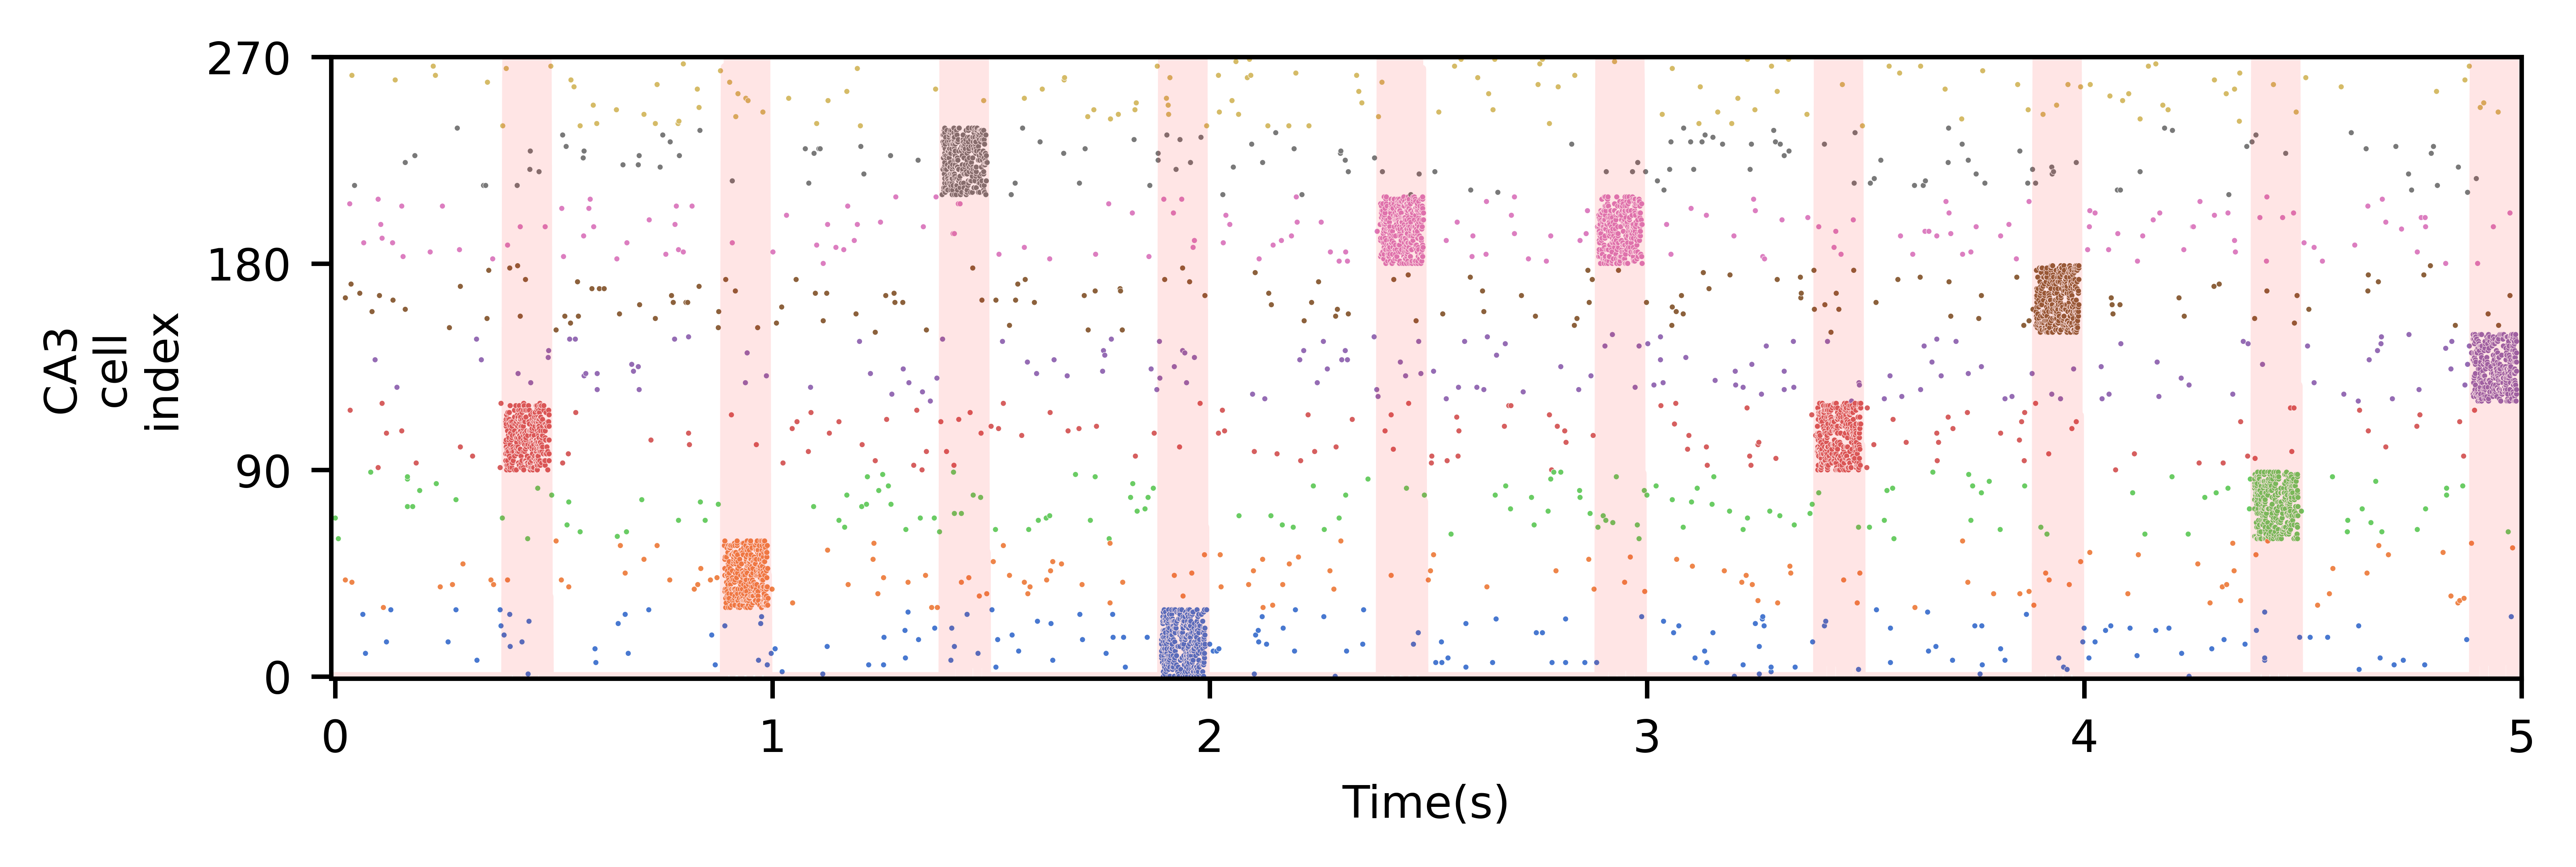

In [8]:
fig, axs = plt.subplots(figsize=(7,2),dpi = 1000)
axs.plot(t_list,results,color = 'red',alpha=0.1)
########################## CA3 cells ###########################
with open(f'results/{exp_name}/{exp_aspect}/{simulation_date}/{trial_number}/data/input_sleep.0.ras', 'r') as f:
    data_observed = f.read().splitlines(True)
    
assembely_colors_plotting = range(1,assembly_number+1)
active_cell = []
time_list=[]
color_list = []
for component in data_observed[1:]:
        comps = component.split(' ')
        if float(comps[0]) >= time_window[0] and  float(comps[0]) <= time_window[-1]:

            active_cell.append(int(comps[1]))
            color_list.append(assembely_colors_plotting[int(active_cell[-1]/30)])
            time_list.append(float(comps[0]))
        
CA3= {'cell_num': active_cell , 'time(s)': time_list ,'Assembly':color_list}

Activity_data_CA3 = pd.DataFrame(data=CA3)

color_palette = "muted"
sns.scatterplot(ax=axs,data=Activity_data_CA3, x="time(s)", y="cell_num",s = 1,hue = 'Assembly', palette = color_palette,legend=False)
# axs.legend(loc='upper left',title='Assembly',bbox_to_anchor=(0, 1.4),ncol = 9)


axs.set_ylabel("CA3\ncell\nindex")
axs.set_xlabel('')

axs.set_yticks(range(0,CA3_size+1,90))
axs.set_xticks([])

axs.set_ylim(-1,CA3_size)
axs.set_xlim(time_window[0],time_window[-1])

axs.set_xticks(np.arange(time_window[0]+0.01,time_window[-1]+0.02,1),range(6))
axs.set_xlabel('Time(s)')

